In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
from scipy import stats

In [112]:
rmg = 0.7
rsg = 0.8
rms = 0.9

rho_mg_s = (rmg - rsg * rms) / (np.sqrt(1 - rsg ** 2) * np.sqrt(1 - rms ** 2))
rho_sg_m = (rsg - rmg * rms) / (np.sqrt(1 - rmg ** 2) * np.sqrt(1 - rms ** 2))

print(rho_mg_s)
print(rho_sg_m)

-0.07647191129018778
0.5461186812727504


In [149]:
N = 76

x1 = np.linspace(1, 10, N) + np.random.randn(N)
x2 = x1 + np.random.randn(N)
x3 = x1 + np.random.randn(N)
#x3 = np.random.randn(N)

df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2
df['x3'] = x3

cor_mat_r = df.corr()
print(cor_mat_r)
print(' ')

print(cor_mat_r.values[0, 1])
print(' ')

pc = pg.partial_corr(df, x='x2', y='x3', covar='x1')
print(pc)

          x1        x2        x3
x1  1.000000  0.956591  0.939151
x2  0.956591  1.000000  0.915579
x3  0.939151  0.915579  1.000000
 
0.9565912228733112
 
          n         r          CI95%     p-val
pearson  76  0.171761  [-0.06, 0.38]  0.140621


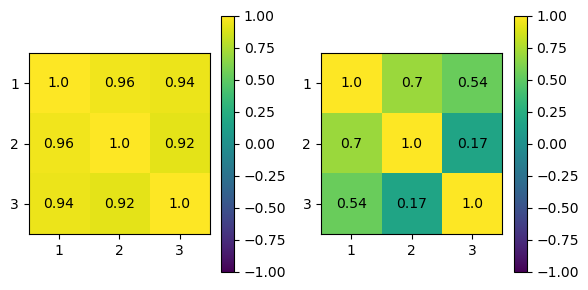

In [150]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

im_show_1 = ax[0].imshow(cor_mat_r.values, vmin=-1, vmax=1)
plt.colorbar(im_show_1, ax=ax[0])
ax[0].set_xticks(range(3), range(1, cor_mat_r.shape[1] + 1))
ax[0].set_yticks(range(3), range(1, cor_mat_r.shape[0] + 1))

for i in range(cor_mat_r.shape[0]):
    for j in range(cor_mat_r.shape[1]):
        ax[0].text(i, j, np.round(cor_mat_r.values[i, j], 2), horizontalalignment='center', verticalalignment='center')

partical_cor_mat = df.pcorr()

im_show_2 = ax[1].imshow(partical_cor_mat.values, vmin=-1, vmax=1)
plt.colorbar(im_show_2, ax=ax[1])
ax[1].set_xticks(range(3), range(1, partical_cor_mat.shape[1] + 1))
ax[1].set_yticks(range(3), range(1, partical_cor_mat.shape[0] + 1))

for i in range(partical_cor_mat.shape[0]):
    for j in range(partical_cor_mat.shape[1]):
        ax[1].text(i, j, np.round(partical_cor_mat.values[i, j], 2), horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.show()

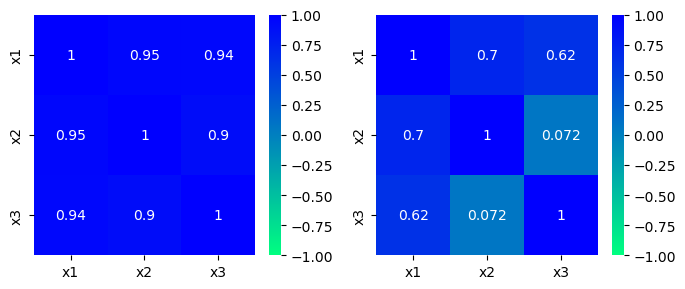

In [140]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(7, 3))

sns.heatmap(cor_mat_r, ax=ax[0], annot=True, cmap='winter_r', vmin=-1, vmax=1)

sns.heatmap(partical_cor_mat, ax=ax[1], annot=True, cmap='winter_r', vmin=-1, vmax=1)

plt.tight_layout()
plt.show()